In [1]:
import numpy as np
import csv
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
im_inds = []
im_names = []
im_prices = []
with open('../datasets/bikes_filtered.csv', 'r') as f:
        datareader = csv.reader(f)
        for line in datareader:
            im_inds.append(line[0])
            im_names.append(line[1])
            im_prices.append(line[2])
            
# Load training and eval data
cnn_feats_compressed = np.load("bikes_cnn_pca_features.npy")
pca_components_ = np.load("bikes_cnn_pca_components.npy")

train_data = cnn_feats_compressed
im_prices_int = []
for i in im_prices:
    im_prices_int.append(int(i))
train_labels = im_prices_int


regr = linear_model.LinearRegression()

regr.fit(train_data, train_labels)

label_pred = regr.predict(train_data)

for a,b in zip(train_labels, label_pred):
    print(a,b)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(label_pred, train_labels))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(train_labels, label_pred))

cnn_error = []
for a,b in zip(train_labels, label_pred):
    cnn_error.append((np.absolute(a-b),a,b))
cnn_error.sort(key=lambda x: x[0])

cnn_error_x = range(len(cnn_error))
cnn_error_val = []
cnn_error_y_label = []
cnn_error_y_pred = []
for e in cnn_error:
    cnn_error_val.append(e[0])
    cnn_error_y_label.append(e[1])
    cnn_error_y_pred.append(e[2])
    

1300 1731.65169688
70 1414.80310317
70 1414.80310317
80 -98.5952589479
80 488.187384161
81 -570.852167072
90 75.6511212509
90 -943.946441615
100 1321.86364593
100 395.978747152
100 546.091535502
100 141.851912109
100 1741.46262065
100 533.714637649
100 1741.46262065
100 533.714637649
105 506.668068569
109 -267.183972079
110 1225.99495371
110 1225.99495371
110 753.26753676
110 1070.128933
110 -190.699721731
110 -98.5952589479
110 270.246476057
110 -166.746046686
110 643.632620315
110 312.845610221
110 -218.291521528
110 157.151951878
110 -19.7901919227
110 -604.234768344
110 -93.387697297
110 -218.291521528
110 157.151951878
110 -19.7901919227
110 -1148.44471773
110 -1148.44471773
110 228.869630056
110 228.869630056
110 1490.36361242
115 282.844138919
115 -133.374411502
115 489.841812364
115 -236.822207422
115 18.7772770694
115 1240.48554733
115 1240.48554733
115 59.2437352255
115 -615.040835996
115 -835.906026873
115 636.808729894
116 504.498562078
120 755.486704976
120 551.949334017
1

200 874.869708977
200 569.556125129
200 279.009285181
200 72.8231825881
200 279.009285181
200 -459.94464865
200 288.89838091
200 820.280928033
200 217.658310799
200 -539.520579836
200 66.9666329814
200 77.6158455646
200 205.062001226
200 66.9666329814
200 233.153536262
200 66.9666329814
200 233.153536262
200 184.151318717
200 541.81632702
200 997.213932808
200 522.660330823
200 541.81632702
200 783.91388991
200 66.9666329814
200 77.6158455646
200 205.062001226
200 345.772163464
200 1316.51754092
200 424.265185863
200 628.720295662
200 649.767532798
200 379.366896489
200 1266.20710268
200 798.372252162
200 1007.00390893
200 848.777901874
200 816.554745993
200 10.5047480065
200 10.5047480065
200 -515.76062013
200 -579.385790997
200 852.063800004
200 592.067667163
200 101.02431839
200 140.764673637
200 852.063800004
200 592.067667163
200 -365.283635653
200 67.776913144
200 -292.820723582
200 497.469098973
200 -292.820723582
200 650.598521816
200 919.607458872
200 919.607458872
200 549.965

280 768.866205647
280 401.472970269
280 -261.18812231
280 -261.18812231
280 -556.638704357
280 640.543370493
280 222.149553624
280 57.6637613762
280 522.097428431
280 -350.841374726
280 330.551246619
280 260.049780587
280 -418.744546058
280 414.331387884
280 346.368260901
280 297.084757403
280 245.348730458
280 -350.841374726
280 739.353723295
282 1205.1718117
282 500.2838205
282 636.432917236
285 -1732.44846539
285 509.085524298
285 -1059.09311656
285 303.37823713
285 397.074869232
285 327.672462484
285 342.934305619
285 -223.97566917
285 897.708395776
285 624.385412513
285 -223.97566917
285 305.893097905
285 564.544853775
285 -240.037773547
285 260.181912718
285 224.473063676
285 697.958632434
285 451.469131211
285 988.436215557
285 988.436215557
285 808.782777849
285 1550.39855011
285 545.312236837
285 -87.6216638699
285 570.339920829
285 570.339920829
285 312.105835963
287 764.702581108
289 1001.56239906
289 745.31834264
289 1001.56239906
290 719.348533273
290 314.709697841
290 675

335 1784.53434409
335 829.796084847
335 678.070113152
335 887.308967837
337 100.772196329
339 1275.89029852
339 2446.95161211
339 656.680505734
339 346.16829618
339 12.1279934857
339 142.911832983
339 12.1279934857
339 142.911832983
339 -49.459513093
339 569.899524669
339 1662.54198886
339 1159.64383122
339 2056.88921818
339 -265.48030147
339 -21.0859050808
339 504.164344944
339 774.500136092
339 21.8650884802
339 143.399681071
339 143.399681071
340 788.904473754
340 2086.50215874
340 1005.64589949
340 1132.8916056
340 2181.40617333
340 881.790899981
340 719.031351407
340 585.482669786
340 934.187456627
340 1140.64829033
340 125.505309559
340 281.569781379
340 818.66025626
340 1275.89029852
340 42.7228281041
340 3.19009354538
340 -436.844295895
340 665.010860787
340 -485.932693142
340 476.944503571
340 1277.55443369
340 834.619027781
340 1031.65525746
340 1474.5978315
340 1474.5978315
340 432.761130616
340 1025.03068425
340 1012.61979748
340 284.424553931
340 -71.6060505187
340 1063.79

380 133.234012311
380 501.305025334
380 -35.541954893
380 666.36279209
380 697.162821832
380 443.40180035
380 501.305025334
380 666.36279209
380 697.162821832
380 443.40180035
380 53.6892111886
380 217.884236638
380 775.90682292
380 585.512917221
380 332.430603229
380 175.73998678
380 84.9757377681
380 646.11141508
380 -3.87911555605
380 1152.37214821
380 1032.25721108
380 332.430603229
380 901.620280965
380 1550.21881418
380 580.103107518
380 408.951183718
380 884.517705689
380 603.504658574
380 1014.79611618
380 387.705242148
380 823.665653684
380 291.633470916
380 1113.82814173
380 1406.39826651
380 -445.988232924
380 800.419605588
380 718.257364698
380 -445.988232924
380 590.090986214
380 -219.839064075
380 -59.9742578447
380 382.639379722
380 543.119598246
380 320.66778477
380 692.247557075
380 264.258948657
380 60.2769782682
380 329.693259284
380 278.599620626
380 -244.136959739
380 580.466890945
380 674.116198913
380 324.733702859
380 525.633845999
380 546.945918681
380 273.0867

425 149.912915124
425 106.173052828
425 119.753390085
425 270.090301061
425 496.932622842
425 255.669486022
425 106.173052828
425 642.383015125
425 533.553964359
425 658.69086302
425 2417.97679467
426 977.524441859
426 977.524441859
427 994.005013041
427 994.005013041
429 1274.78087272
429 66.6536154431
429 500.673055067
429 82.4371837005
429 292.711118188
429 528.435034751
429 214.162190468
429 -226.529008876
429 -226.529008876
429 528.435034751
429 214.162190468
429 536.790160752
429 536.790160752
429 369.839569054
429 1044.09453305
429 1002.65017979
429 1366.39314851
429 551.625645335
430 1691.89464498
430 1113.60345813
430 114.187137656
430 549.708360131
430 3.49818774093
430 -44.4545385751
430 798.748173932
430 53.1066780172
430 351.541877973
430 1085.60445322
430 798.748173932
430 1990.57784117
430 605.310956868
430 605.310956868
430 589.849743154
430 864.147888352
430 635.905068936
430 933.32957979
430 559.48517591
430 100.588814806
430 281.992360843
430 795.475423899
430 712.97

470 35.1975257087
470 820.478392098
470 694.843295479
470 392.043929522
470 29.5838129436
470 195.971346283
470 1575.89793611
470 280.150277621
470 242.306075896
470 1762.03654632
470 47.793477524
470 434.123055862
470 738.864375062
470 1679.8930837
470 484.647774813
470 -183.85446187
470 366.800649724
470 174.103445589
470 429.933418675
470 1174.40590127
470 1222.96886256
470 646.198275387
470 1082.62994669
470 1271.12577561
470 -6.00494105802
470 336.109484908
470 484.505932665
470 151.706483416
470 1204.57484049
470 116.177685127
470 48.3826942111
470 610.855927185
470 642.880045218
470 95.3116696699
470 95.3116696699
470 415.352349596
470 1742.72284927
470 1070.79157796
470 578.119259772
470 1991.35744601
470 246.449994896
470 118.005295002
472 897.17909521
472 1046.82467799
472 1046.82467799
473 348.852624179
475 338.897654636
475 221.839596227
475 -717.32568195
475 371.325851918
475 836.008985734
475 -114.691200775
475 -717.32568195
475 923.884796382
475 923.884796382
475 74.9853

530 1187.56648914
530 1323.85433543
530 949.465694133
530 807.958743727
530 2460.24541876
530 134.618176767
530 1247.51843474
530 166.956441073
530 576.929695341
530 628.23895627
530 403.137439978
530 1030.27007078
530 667.900628161
530 411.381019186
530 480.476520913
530 803.246613888
530 1251.58596014
530 -278.918570545
530 500.360100313
530 2668.55595832
530 746.002704989
530 563.227076741
530 1860.01248254
530 1860.01248254
530 94.1287961385
530 94.1287961385
530 658.926141551
530 732.069423673
530 529.385950212
530 390.620180103
530 260.941197968
530 649.44577775
535 93.0087406283
535 2365.96467751
535 929.789304721
535 1124.88262083
535 -648.14844127
535 -506.45203544
535 596.458491772
535 421.170742292
536 1134.4039453
536 436.031760496
536 436.031760496
537 593.614538541
539 960.696804837
539 -314.26967569
539 -707.257991301
539 684.951278479
540 1044.70524038
540 960.696804837
540 -359.084767359
540 304.782749832
540 533.38397787
540 -359.084767359
540 788.826394065
540 617.78

600 1149.26292865
600 1064.5700467
600 417.257950241
600 755.8341561
600 1234.82828771
600 664.625019799
600 1477.2081678
600 970.584877574
600 1516.9231988
600 1505.67090556
600 830.990790073
600 2345.77753725
600 348.747621734
600 418.244353045
600 1165.01254239
600 462.765508209
600 -54.7423940139
600 69.0814166715
600 462.765508209
600 138.769092932
600 777.938757951
600 986.321556069
600 977.208789991
600 452.342281642
600 1108.94842667
600 594.880834077
600 682.782555817
600 1438.13304996
600 1752.66334119
600 1412.81484243
600 2192.72649784
600 452.342281642
600 908.922732624
600 1821.05708653
600 612.93116571
600 1244.10904016
600 154.019224267
600 -622.269388816
600 1411.54278332
600 448.790482091
600 316.565114589
600 1140.37559492
600 1140.37559492
600 745.292991835
600 1072.63051677
600 863.175614326
600 295.143591638
600 -117.205558257
600 295.143591638
600 448.790482091
600 1140.37559492
600 1140.37559492
600 745.292991835
600 863.175614326
600 295.143591638
600 -117.2055

650 325.956400064
650 291.151246158
650 283.245089036
650 729.26171587
650 2643.26414086
650 2193.01891885
650 2374.93237617
650 1818.16702515
650 1900.62977425
650 463.415948017
650 1071.25123146
650 315.411847167
650 2015.99777406
650 604.120434572
650 783.990651697
650 2015.99777406
650 2015.99777406
650 1071.25123146
650 315.411847167
650 1071.25123146
650 315.411847167
655 747.108067245
655 161.683163678
655 1201.17461189
655 788.20383801
655 539.634026106
655 -268.738097991
655 539.634026106
655 -268.738097991
655 752.648417768
655 981.363631207
655 788.267632501
655 572.844604226
655 436.502523423
655 1243.51381136
655 548.933081854
655 1132.04411605
655 828.251108908
656 552.467196641
659 1297.41761279
659 1297.41761279
659 1104.92624724
659 1104.92624724
659 1248.89597148
659 1104.92624724
659 1248.89597148
659 1248.89597148
659 1104.92624724
659 1248.89597148
659 1104.92624724
659 1248.89597148
659 1104.92624724
659 1248.89597148
659 1104.92624724
659 1826.89982037
659 1660.1

720 1556.60727337
720 1054.73412355
723 704.004190374
725 309.328966028
725 1723.14398171
725 405.141267665
725 1723.14398171
725 1590.74117452
725 673.166103882
725 1358.48006232
725 1358.48006232
725 905.592851288
725 905.592851288
725 624.351864389
725 1236.15612648
725 1061.02374735
725 1714.89493635
725 906.261397139
725 456.711222152
725 356.201087968
725 461.105502268
725 312.808919223
725 750.715340398
725 1493.49883104
725 584.563610841
725 1642.52466196
725 300.145230325
725 750.715340398
729 1083.84809248
729 1562.00653902
729 1562.00653902
729 1068.33577135
729 769.240835071
729 769.240835071
729 122.311097045
729 1010.8829893
729 669.715223413
729 966.712696886
729 -270.178957136
729 815.834016542
729 815.834016542
729 1065.63940756
729 569.67891036
729 724.410225925
730 -215.230916516
730 -215.230916516
730 772.65574837
730 -215.230916516
730 -215.230916516
730 772.65574837
730 1176.14456695
730 850.01926152
730 751.562023531
730 946.976914061
730 353.438874708
730 374.57

850 524.474161456
850 1001.76549155
850 1106.48200321
850 811.91533899
850 1477.44550572
850 1682.30618656
850 1415.0758699
850 1415.0758699
850 1342.10989997
850 1342.10989997
850 1005.50749533
850 703.511754002
850 1778.63503827
850 1160.38923722
850 1333.76858226
850 1106.48200321
850 2279.32462697
850 1808.83081964
850 2263.03561049
850 2164.33276379
850 1535.14389612
850 733.539995547
850 1503.83895987
850 -232.163009537
850 293.751684052
850 590.216336984
850 1583.16600408
850 2845.98088618
850 2556.86888508
850 -232.163009537
850 973.665143679
850 2379.83820991
850 1606.37411337
850 1649.71645989
850 896.085400226
850 1361.98333873
850 1615.68654811
850 1256.42199233
850 1392.80730735
850 983.215099761
850 1367.71671709
850 234.072021567
850 731.665777703
850 1330.33540939
850 284.813858202
850 1118.8650543
850 1496.76168051
850 1526.38365862
850 218.231683128
850 871.361802951
850 1138.18652753
850 587.333232429
850 -36.6882391545
850 -36.6882391545
850 1130.1347303
850 2757.57

950 1916.19836941
950 670.441756884
950 2026.55170023
950 1579.78304327
950 1308.55130492
950 1511.74954662
950 714.140815299
950 828.522870568
950 2553.51068717
950 1446.272978
950 1809.30786122
950 1809.02924108
950 1315.24107006
950 260.541473005
950 -42.033632908
950 261.362205895
950 1324.30716832
950 1271.47923072
950 1271.47923072
950 1755.04500008
950 458.612275478
950 268.422268675
950 1146.51864599
950 870.897269667
950 589.018129866
950 798.964622752
950 589.018129866
950 870.897269667
950 682.182157314
950 921.58354571
950 285.976794778
950 943.211652751
950 974.773037347
950 921.58354571
950 285.976794778
950 2053.40109679
950 921.58354571
950 285.976794778
950 307.483907339
950 1032.98678546
950 762.795733532
950 598.038080123
950 791.982447673
950 1578.09138005
950 1140.83744095
950 1193.69448353
950 1126.90011723
950 323.134352337
950 114.206561436
950 1704.53224151
950 1696.14161506
950 1205.50181819
950 1140.513264
950 1704.53224151
950 1696.14161506
950 545.132435765

1100 1482.05060225
1100 1924.06365565
1100 974.244709796
1100 813.249234939
1100 983.623541699
1100 2040.94905019
1100 1342.18300467
1100 735.466641168
1100 3026.59685697
1100 1109.73301883
1100 1341.83313292
1100 1619.77847351
1100 1113.11739631
1100 2080.22793049
1100 2652.13870469
1100 1744.16750902
1100 2192.1068326
1100 1744.16750902
1100 2192.1068326
1100 794.546423516
1100 1152.93273879
1100 2769.67164655
1100 1857.24741146
1100 1127.07713099
1100 575.169997419
1100 1122.85824836
1100 559.183061056
1100 1098.95515012
1100 624.958745101
1100 1767.38482031
1100 1858.77752955
1100 2596.05250214
1100 1211.6444484
1100 1494.8874454
1100 1032.95609654
1100 2376.09971834
1100 1893.47253014
1100 1575.46693868
1100 538.675808398
1100 1838.94358375
1100 1879.9700409
1100 2328.80885795
1100 2299.24976508
1100 1920.22224586
1100 1423.69727926
1100 2328.80885795
1100 1302.56910308
1100 2165.41946478
1100 1549.18393998
1100 1266.8768907
1100 1216.23134218
1100 1569.98898738
1100 1569.98898738

1300 1537.78414119
1300 977.268727464
1300 1396.18981555
1300 2681.98869008
1300 1850.61737705
1300 2664.35877264
1300 2743.42866768
1300 1670.98720458
1300 1148.87715347
1300 1009.94347293
1300 963.343698395
1300 1761.16894545
1300 1213.83499486
1300 1213.83499486
1300 1240.2923087
1300 1290.31544366
1300 1290.31544366
1300 1873.56455122
1300 1580.76202194
1300 1637.67612818
1300 678.66028305
1300 1678.31554162
1300 1317.47635572
1300 1722.95394298
1300 2163.78565257
1300 1701.23620735
1300 1000.65263587
1300 945.537724929
1300 581.86382195
1300 658.985922824
1300 1668.02094845
1300 1915.07239269
1300 2476.4408849
1300 1876.14714511
1300 2288.22219382
1300 1317.29930946
1300 672.49307932
1300 357.362663979
1300 103.197891106
1300 103.197891106
1300 730.122606684
1300 948.997164936
1300 1951.97675412
1300 1584.74079991
1300 2429.99827627
1300 3183.59933193
1300 3519.61948034
1300 2270.14931576
1300 2161.39447629
1300 1097.81428236
1300 1127.2149328
1300 966.090271408
1300 1259.75762167

1585 1727.82077648
1585 1921.79272692
1590 2461.01090837
1590 1129.335673
1590 2089.58872854
1590 2322.13864829
1590 2461.01090837
1590 2224.31455379
1590 1550.83299896
1590 1537.113877
1590 1108.32475587
1595 2804.87111947
1595 2253.30927741
1595 1515.9659311
1595 2331.32295489
1595 2221.47353689
1595 3834.66461147
1595 2600.77184005
1597 516.802632499
1599 2143.56884751
1599 975.966773554
1599 3084.36071256
1599 2574.44692283
1599 3381.69662184
1599 2304.29940249
1599 4633.61508123
1599 2304.29940249
1599 2445.39508349
1599 1469.09226883
1599 2375.82341314
1599 2876.97232492
1599 1844.65397564
1599 1894.41066737
1599 1830.16629242
1599 1830.16629242
1599 1415.59885588
1599 1719.28715717
1599 782.041329778
1599 2222.69942729
1600 1789.10166324
1600 1649.6636253
1600 1561.48022623
1600 1827.18836441
1600 1216.29689444
1600 1733.85740841
1600 2998.05561143
1600 1239.74849955
1600 772.875977222
1600 781.029359154
1600 1071.39058168
1600 2198.68802683
1600 2660.98861468
1600 2712.35861656

1850 2016.60984523
1850 2046.15962854
1850 2380.49255013
1850 2169.25790463
1850 3609.0092241
1850 1559.17617959
1850 2767.84795815
1850 2659.99463713
1850 3023.57492333
1850 3773.80621299
1850 2343.45162616
1850 868.975233871
1850 2194.07916185
1850 1174.29964753
1850 1220.27845647
1850 1582.17067459
1850 2308.73229226
1850 2136.71625232
1850 1968.78317078
1850 2077.74776467
1850 1123.55383791
1850 2767.84795815
1859 3672.31563724
1859 3907.01219012
1859 3907.01219012
1860 2088.2495143
1870 714.71113132
1870 2487.6709367
1870 2350.0667012
1870 2504.75110546
1870 1550.72420656
1870 1444.08974795
1870 3200.55357784
1870 1683.65296531
1870 1617.94749583
1870 1683.65296531
1870 3267.68347996
1870 2936.13945783
1870 714.71113132
1870 2487.6709367
1870 2350.0667012
1870 2504.75110546
1870 1550.72420656
1870 1444.08974795
1870 3200.55357784
1870 3072.24711672
1870 1197.17684078
1870 2033.89049431
1870 4588.66905839
1870 2396.41303148
1870 2462.04679869
1870 3005.0079538
1870 3655.31698465
18

2150 2354.42677957
2150 1025.05009965
2150 2767.84795815
2159 2148.27692846
2160 3210.2808019
2160 3325.7168236
2160 3104.32458786
2161 1808.21347014
2161 2582.29481031
2161 1808.21347014
2166 2774.95668631
2166 2709.05413019
2168 2689.52390118
2170 2019.13323568
2170 1430.56078323
2170 3212.47998247
2170 2479.00194354
2170 2976.64046342
2170 2533.69778849
2170 4070.84709997
2170 3212.47998247
2170 2479.00194354
2170 969.944980363
2170 3067.97968793
2170 3705.19052486
2175 3356.37294704
2175 2518.6560473
2175 3124.28009367
2175 2983.01930108
2175 2264.04100563
2175 2154.52827223
2175 2790.26276306
2180 2546.7922256
2190 2858.81704125
2190 1366.85218371
2195 3134.76046869
2195 2303.51362774
2195 2286.78557952
2195 2303.51362774
2195 2286.78557952
2195 2724.89700301
2195 2727.43977444
2195 2727.43977444
2195 2727.43977444
2196 2297.91381939
2196 2857.98429486
2196 5154.10980589
2199 3338.24833058
2199 2156.05323845
2199 3991.13891906
2199 4237.47060874
2199 3592.20494069
2199 3048.909717

2550 3278.27159698
2550 636.328437944
2550 636.328437944
2550 2159.04329755
2550 2348.60015457
2550 2348.60015457
2560 3752.90600203
2560 3752.90600203
2560 2707.3293676
2570 2174.03266356
2570 3278.76103771
2573 2623.88410228
2575 3718.29571806
2575 3649.98847045
2575 4279.26606387
2580 4086.8875393
2589 3601.15198146
2589 3646.11280366
2590 1737.0591986
2594 2891.59357443
2595 2670.87876304
2595 2648.39082853
2595 2591.25760336
2595 1351.02420422
2595 2110.70048916
2595 2448.51484983
2595 2756.02304878
2598 3365.39744636
2599 3143.94864838
2599 3760.19745536
2599 3917.49800722
2599 2300.49388592
2599 2268.36928274
2599 4345.63810239
2599 4321.30382339
2599 3038.54861974
2599 4225.09919873
2599 2660.46858312
2599 1258.41159191
2599 2577.90470011
2599 3406.64434116
2600 2888.20689476
2600 2994.53069035
2600 3214.38977764
2600 2164.52680201
2600 2624.08892716
2600 2621.76170953
2600 3006.16586982
2600 2640.25683272
2600 2725.85657311
2600 2437.96013365
2600 2214.01794095
2600 2763.65710

2840 3930.00572787
2840 4235.95827456
2840 2589.88157515
2840 2449.44837929
2841 2865.16630505
2841 1363.46898493
2842 1422.65488659
2848 2585.45640553
2848 2585.45640553
2849 2571.4493066
2850 3322.98156964
2850 3396.34465611
2850 2184.49565472
2850 1206.47293894
2850 2346.58334662
2850 3768.02424751
2850 2925.2294009
2850 3381.05505046
2850 2456.90316166
2850 2192.60675727
2850 2632.45715137
2850 2432.22326744
2850 2536.41906681
2850 4987.74002625
2850 3967.59603103
2850 2432.22326744
2857 3176.32805311
2860 3440.67071726
2860 3848.30771355
2864 3134.29639859
2865 4230.22606797
2875 2935.05135821
2875 2586.46001516
2875 2801.77652958
2875 3476.8663617
2875 3543.38368889
2875 4078.49337121
2875 3543.38368889
2875 4078.49337121
2875 2116.73171537
2876 3242.4744587
2876 3596.90107262
2880 3819.41860903
2880 3527.88685384
2880 3397.59664967
2890 2705.9570573
2895 2471.91313946
2895 3497.5471394
2895 2697.65647964
2899 2291.99175124
2899 1195.11302348
2899 2833.60868597
2899 3718.68573401

3335 4309.45267146
3349 2935.36399446
3349 2935.36399446
3349 2906.67905737
3350 3531.77790757
3350 3531.77790757
3350 3876.07929899
3350 3876.07929899
3350 3547.65266837
3350 2807.71264854
3350 3382.84529768
3350 1424.52994232
3350 2982.07692178
3350 4757.26862546
3350 3774.29471744
3350 2282.61151445
3350 2282.61151445
3350 4887.9619314
3350 3564.26999218
3350 2665.18722737
3360 4904.93213521
3360 2445.58833048
3360 3989.80148851
3360 2924.15259353
3360 3908.8469869
3360 4859.98151348
3360 3726.40993122
3366 3904.26612119
3375 4443.45899823
3377 2587.84448683
3377 2587.84448683
3384 4314.12764815
3390 2808.12624211
3390 3045.76598356
3395 3566.15150412
3395 768.764534763
3395 4061.11125975
3399 3584.35633862
3399 3584.35633862
3399 3584.35633862
3399 2578.263878
3399 2578.263878
3399 1906.60100894
3399 3833.51314685
3399 3636.51188551
3400 1350.31281577
3400 3511.4901016
3400 281.323346401
3400 3647.96894179
3400 6023.26664532
3400 2657.87038681
3400 3581.93644083
3400 2975.01556696


3999 1432.20160525
4000 2559.97102583
4000 3504.48845998
4000 2064.32067267
4000 5402.57396865
4000 5826.74362119
4000 3630.04278615
4000 4938.12231751
4000 2840.0660266
4000 2991.75970978
4000 3360.60342388
4000 2683.72147648
4000 4303.63899546
4000 3324.77462143
4000 2419.02824892
4000 2419.02824892
4000 4697.45118811
4000 3408.74348717
4000 2213.32587056
4000 3780.83949204
4000 3932.07060169
4000 3070.60162051
4000 3224.84927357
4000 2759.67604109
4000 2539.06015556
4000 3721.26545709
4000 3841.73179956
4000 2945.43898643
4000 3483.83539935
4000 3586.29062374
4000 2707.22980549
4000 4238.19610704
4000 3809.95670841
4000 2539.06015556
4000 2908.59452145
4000 3790.93507281
4000 3790.93507281
4000 3893.75362048
4000 4122.59300697
4000 3650.51690337
4000 3521.37892812
4000 4088.3719888
4000 2993.5990749
4000 3833.24313487
4000 3130.21335321
4000 1955.39331979
4000 2082.62911371
4000 3215.74411662
4000 3104.92294813
4000 3912.39442125
4000 2902.69251078
4000 2902.69251078
4000 3633.36316

4869 4462.01070814
4869 4816.72526306
4870 4507.32890456
4870 3515.97222879
4870 3813.48668343
4870 3375.23324578
4870 4650.39077868
4875 3140.46864261
4880 4904.93213521
4880 5012.65166967
4880 4194.24118711
4895 5080.33697125
4895 2795.44293664
4899 3680.04156525
4900 3265.16049463
4900 4336.71107163
4900 4793.470559
4900 3626.06741144
4900 3218.72401412
4900 3633.65254257
4900 4015.27352039
4900 2174.86650644
4900 3214.73337172
4900 4254.33039858
4900 3218.72401412
4900 3830.91824571
4900 3377.54512404
4900 6344.57756781
4900 5216.21148311
4900 5156.75368507
4900 4033.90890843
4900 2837.2075082
4900 4173.38495387
4900 5333.78409232
4900 3809.6956591
4900 4944.82100878
4900 2600.99008571
4900 3488.81538929
4900 3579.98201082
4900 2980.89894691
4900 2980.89894691
4900 3139.55007728
4900 3207.37381154
4900 3133.37803301
4900 4790.72041409
4900 5087.94312881
4900 2930.75367531
4905 2166.89482588
4919 3958.55460888
4925 2656.47897759
4930 2744.26902707
4930 2744.26902707
4930 4282.095311

6175 4630.59950358
6175 5508.79190899
6180 4282.09492418
6190 5288.80595346
6199 4047.62068812
6199 3872.11532447
6199 3670.62601049
6199 5016.73022988
6199 2751.7973117
6199 4599.83787296
6199 5599.31874437
6199 3930.57906656
6200 3361.52209538
6200 3880.43305909
6200 5364.63224193
6200 6751.25018753
6200 5316.91562405
6200 4318.73713404
6200 4120.04024379
6200 2451.82628496
6200 4257.64703586
6200 4257.64703586
6200 4115.27191176
6200 4563.51447805
6200 4357.23175891
6200 5351.40080418
6200 3037.3894762
6200 4197.39095675
6200 3518.74095039
6200 6567.72138163
6200 6363.34872239
6200 4787.37755496
6200 4307.55456976
6200 4559.8775899
6200 3939.73379522
6200 5131.81411959
6200 5910.3043062
6200 3567.83600923
6200 2952.14041031
6200 4355.79132325
6225 4987.40335038
6245 4342.91160989
6250 5211.07260239
6253 4054.0188126
6285 2766.77531963
6299 6568.30952879
6299 3930.57906656
6299 3768.49842859
6299 3258.98880025
6299 3806.06914925
6299 3204.19863277
6299 3127.58212111
6299 3637.5807686

13900 5437.64197553
13999 7692.58081003
13999 2321.1173613
14000 5756.52352157
14000 4940.42891264
15000 4730.26759715
18000 5265.80201332
2820 2347.00037074
3790 3951.39119109
3790 4106.22095633
1570 1659.65370657
2170 2799.23965679
1300 2203.04433866
2920 4515.20244343
4870 4311.25595947
3790 3976.79603434
Coefficients: 
 [-1.06603241 -0.49655048  1.83477768  1.08845316  1.01576264 -2.52001518
 -1.27284303 -0.2029759   0.55179169  1.90619233 -3.61931842 -1.46161448
 -0.91041015 -1.29455833  0.10708292 -0.40573277  2.32599824 -0.20242659
 -1.17102101 -1.07948059  1.33822629 -1.612521    1.71683894 -0.57377608
 -0.17515386  0.85382321  1.09471371  2.21401518 -1.24474803  1.29700728
  2.06078901 -0.32667306 -0.46476996 -0.99834972 -0.19915188 -0.98523232
  1.79563852 -0.15122605  0.71475855 -0.72378659 -0.91990408 -0.07557521
  0.87807967  0.59783552  0.18303584  0.7120975  -2.16227236 -0.18724279
  0.01850795  0.0491609  -0.56193472 -1.18748659  0.66884013 -1.05210523
 -1.16273987  0.2

In [4]:
# Load training and eval data
hog_images_compressed = np.load("hog_images_compressed.npy")
pca_components_ = np.load("pca_components.npy")
train_data = hog_images_compressed
im_prices_int = []
for i in im_prices:
    im_prices_int.append(int(i))
train_labels = im_prices_int


regr = linear_model.LinearRegression()

regr.fit(train_data, train_labels)

label_pred = regr.predict(train_data)

for a,b in zip(train_labels, label_pred):
    print(a,b)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(label_pred, train_labels))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(train_labels, label_pred))


hog_error = []
for a,b in zip(train_labels, label_pred):
    hog_error.append((np.absolute(a-b),a,b))
hog_error.sort(key=lambda x: x[0])

hog_error_x = range(len(hog_error))
hog_error_val = []
hog_error_y_label = []
hog_error_y_pred = []
for e in cnn_error:
    hog_error_val.append(e[0])
    hog_error_y_label.append(e[1])
    hog_error_y_pred.append(e[2])

1300 3191.02090698
70 2509.61039732
70 2509.61039732
80 -381.104807504
80 144.79653946
81 689.688572748
90 220.537656117
90 492.755091786
100 405.677933464
100 225.744482487
100 224.729803993
100 845.180188047
100 959.863624399
100 645.289043268
100 959.863624399
100 645.289043268
105 584.594668564
109 1819.34518814
110 1844.06404974
110 1844.06404974
110 729.605121328
110 20.7149855159
110 449.032074578
110 -381.104807504
110 -226.092676123
110 884.541198546
110 998.648846554
110 -11.5424235605
110 1076.81043814
110 235.102672108
110 35.6626118734
110 12.9163243286
110 157.306678067
110 1076.81043814
110 235.102672108
110 35.6626118734
110 1302.70537908
110 1302.70537908
110 635.56294338
110 635.56294338
110 3651.69573658
115 2031.72584426
115 1444.42155163
115 831.885242732
115 -673.575368236
115 1001.5280274
115 134.038994614
115 134.038994614
115 -173.634311969
115 -12.51963595
115 51.5065578981
115 -141.759555153
116 -701.949186297
120 743.520208217
120 942.243929017
120 710.35194

220 618.164889001
220 -632.048266242
220 18.0244984664
220 18.0244984664
220 687.408941229
220 823.071825295
220 -762.199106175
220 1242.43303993
220 1636.27104555
220 1342.68476074
220 371.995836213
220 1894.61752399
220 546.285492105
220 690.302343364
220 954.079450458
220 540.79833652
220 383.482649539
220 628.92362546
220 85.9468512193
220 -707.775495705
220 -22.5511855779
220 -1.65281825572
220 -707.775495705
220 -109.991652339
220 1076.73033571
220 -65.4392776007
220 316.894830063
220 -278.57995042
220 11.2294303328
220 1472.64512817
220 -65.4392776007
220 340.018126172
220 176.946322168
220 952.567434971
220 824.07096961
220 866.144134756
220 392.36203255
220 424.705024824
220 766.118130098
220 714.015215294
220 140.348271893
220 591.273624634
220 -543.204945892
220 338.184190444
220 1868.88228727
224 139.29162526
224 -430.709957435
225 -464.225717086
225 -120.68337087
225 1169.52075094
225 883.987475856
225 286.534067333
225 1169.52075094
225 -118.21798917
225 291.802051258
225

290 1055.14436694
290 420.539264217
290 367.405581478
290 27.3406799528
290 27.3406799528
290 378.074164859
290 -87.5751500461
290 829.030836124
290 -217.298424182
290 839.204182789
290 393.216031574
290 457.374102301
290 145.219828796
290 1726.91822137
290 1178.96922618
290 1907.42988791
290 1178.96922618
290 1907.42988791
290 189.14121926
290 -116.214831153
290 818.649684362
290 -96.9557223421
290 733.57562921
290 157.438036239
290 1069.29591867
290 -57.552353274
290 640.047580592
290 255.599291488
290 475.110883578
290 377.73782304
290 1488.58657213
290 1015.08019882
290 892.814584805
290 400.078676882
290 518.127011708
290 715.567085695
290 125.638272994
290 607.596027975
290 841.236461283
290 367.405581478
290 1055.14436694
290 420.539264217
290 367.405581478
290 862.086305688
290 142.43339737
290 27.881686461
290 537.421332075
290 373.810280565
290 56.8982826462
290 1410.7667544
290 -13.22307822
290 1351.55368557
290 404.769094738
290 889.140363147
290 -615.350887678
290 930.5885

330 475.578171247
330 -595.618622183
330 116.060803974
330 139.454878965
330 1168.05586623
330 643.590651901
330 2126.69506757
330 652.849765722
330 214.737967196
330 723.840101924
330 475.310685852
330 436.879606856
330 1529.99524408
330 896.347305032
330 1386.24343247
330 441.809980524
330 625.590009207
330 158.96412481
330 -35.2988569062
330 643.590651901
330 2126.69506757
330 1532.66907309
330 672.096096822
330 2151.52195682
330 391.683882603
330 346.646305673
330 662.221703039
330 61.2965475865
330 742.71383389
330 1060.20170144
330 1051.75557124
330 -161.163475857
330 816.742091285
330 1060.20170144
330 1051.75557124
330 -13.4217449303
330 -75.4602459618
330 129.917423869
330 -130.290449087
330 573.598145923
330 2660.89929578
330 1870.52174089
330 617.908090492
330 242.144740102
330 798.098249905
330 31.7237579141
330 526.680617814
330 488.467592595
330 1004.70954079
330 1004.70954079
330 781.497966861
330 15.3315632802
330 278.922662225
330 541.254921615
330 889.518840438
330 61

370 969.064334044
370 298.100223435
370 -1.42301137061
370 15.7067961942
370 562.37206664
370 -1166.1118832
370 1173.92257023
370 -1166.1118832
370 1173.92257023
370 1.55646872754
370 -52.8643841991
370 279.864086346
370 611.810103346
370 1528.09663189
370 1066.8707777
370 663.989631468
370 453.418494547
370 950.476624617
370 2395.40672065
370 416.650559916
370 1056.74116666
370 3009.29177603
370 556.603621524
370 126.916717048
370 440.559595404
370 -104.565836465
370 360.302824779
370 856.724988291
370 780.277979548
370 -104.489269518
370 -223.684798337
370 -671.278268766
370 588.957408037
370 588.957408037
370 554.82124501
370 711.290763543
370 -311.521973339
370 789.868690754
370 900.891198616
370 409.538534217
370 783.227523725
370 737.244657151
370 648.62854896
370 555.154079096
370 744.899841171
370 409.538534217
370 875.56119224
370 1374.01839658
370 258.909908452
370 630.899736447
370 358.903761377
370 376.669347913
370 -29.9147405725
370 165.454341702
370 756.932415813
370 29.

400 506.892037581
400 -289.793634239
400 122.119297874
400 1185.21504509
400 969.016319654
400 550.25281729
400 452.08466807
400 2771.04804498
400 1038.50164464
400 19.3289241763
400 19.3289241763
400 899.733784919
400 826.330673155
400 585.624603899
400 1042.85087619
400 197.767061765
400 421.851324844
402 124.063442327
402 1779.95804481
403 185.318229666
405 1973.39984057
405 1238.86821928
405 1238.86821928
405 1238.86821928
405 932.435290571
405 268.641756832
405 363.648250254
405 354.961994073
405 647.004869777
405 1578.28359283
409 2496.2650967
409 1993.47665695
409 442.808850498
409 442.808850498
409 442.808850498
409 442.808850498
409 -181.383800584
409 -910.037465092
410 560.137637431
410 249.794513647
410 517.502063599
410 677.038770201
410 677.038770201
410 1335.02627594
410 -324.363128642
410 1676.4547892
410 248.556375414
410 739.67001817
410 873.930860083
410 423.706068567
410 840.516193048
410 1124.0610979
410 608.541397009
410 707.690918561
410 402.420153396
410 875.9679

449 1205.54438798
449 2229.22912069
449 2229.22912069
449 300.644522449
450 371.973887256
450 162.73630522
450 27.9335076158
450 464.770108339
450 1658.82822239
450 253.755432959
450 1652.98318964
450 7.00007782522
450 384.116788259
450 208.908240726
450 1383.47500186
450 582.827701843
450 985.998189139
450 724.736630411
450 796.998278249
450 661.497385101
450 661.497385101
450 1577.68359941
450 454.598311285
450 668.649694018
450 1160.12241421
450 396.476916313
450 684.197866639
450 684.197866639
450 94.6478758671
450 1013.47296588
450 227.981237744
450 1084.91875055
450 1233.93898151
450 1233.93898151
450 1075.13736769
450 452.168027706
450 94.6478758671
450 619.649763518
450 126.097654514
450 611.443009925
450 611.443009925
450 2056.87366155
450 1836.12103749
450 92.3951168004
450 -27.7418830192
450 813.00158225
450 261.899582159
450 186.938925698
450 1373.82770056
450 574.514842371
450 2.45915545276
450 425.206441602
450 579.969657928
450 467.433012388
450 604.691256373
450 139.044

500 1284.3811862
500 1555.95513573
500 397.439362908
500 583.208126923
500 78.8409131428
500 481.239976904
500 2340.88237574
500 1147.49468841
500 1392.69258143
500 2147.48430644
500 1685.01629516
500 1685.01629516
500 226.644360858
500 696.648769648
500 485.85345131
500 1823.0656145
500 1343.21529168
500 620.242141683
500 846.001916354
500 960.97680433
500 705.877039183
500 762.172371974
500 846.919850427
500 1587.16495192
500 1587.16495192
500 679.597667195
500 962.840497552
500 1790.71979296
500 847.911504459
500 1372.28268115
500 659.365316266
500 966.749992307
500 688.934081639
500 508.734853612
500 423.774589266
500 824.635738903
500 1850.12076485
500 826.266971914
500 208.054417172
500 661.375783757
500 1233.50734649
500 1354.27602524
500 1172.25276757
500 568.948821982
500 887.491715863
500 924.814686044
500 -283.454577656
500 654.45898206
500 108.365791226
500 737.037887271
500 1131.88120919
500 531.867852229
500 910.616323561
500 428.40997275
500 541.744272488
500 311.1581864

570 -405.171226075
570 571.799881024
571 276.210007505
571 850.698196249
575 757.323136492
575 1382.04586797
575 550.592210144
575 324.333797892
575 940.046457072
575 1752.65140775
575 453.609624165
575 1886.90890503
575 806.147521735
575 -294.337855285
575 80.246379725
575 1886.90890503
575 558.048537019
575 1212.45962462
575 795.5798724
575 1256.38511443
575 1136.01684519
575 1416.44437842
575 976.788475097
575 642.080136011
575 1416.44437842
577 789.958712751
578 1642.20005509
579 1329.07489409
579 1273.48260522
579 1341.26389472
579 2958.25456969
579 515.82390628
579 515.82390628
579 1710.54751705
579 804.28988447
579 1916.25302815
579 1459.69192223
579 2073.58592287
579 2046.55317871
579 167.073513489
579 -2.84697354866
579 9.59129029982
579 1991.26908077
579 922.533072425
579 1186.09741581
579 1991.26908077
579 922.533072425
579 1039.10754042
579 1591.54966126
579 2166.26074456
580 263.230340091
580 1532.23758428
580 66.8334192753
580 1830.31041171
580 1522.34155877
580 1522.3415

650 754.032520946
650 1003.58682634
650 1213.83829607
650 1518.69202683
650 1448.52230245
650 2057.73072097
650 2057.73072097
650 366.897071759
650 366.897071759
650 73.621102265
650 570.611616033
650 529.069207833
650 1099.46542992
650 1122.70211031
650 595.576720084
650 1499.06701024
650 1510.17396097
650 342.322166759
650 -141.262299389
650 593.037537589
650 947.586571432
650 281.715792697
650 668.586890192
650 1627.7269916
650 1204.31855491
650 2834.49545253
650 2533.77561002
650 2026.40970559
650 1884.15409028
650 1465.07199288
650 2834.49545253
650 259.274155456
650 911.683074711
650 1187.723326
650 639.530166852
650 -334.677571883
650 309.611624206
650 832.690704766
650 394.62025707
650 767.844830045
650 893.801686387
650 408.465732612
650 366.242891385
650 457.715977158
650 793.570342313
650 826.269153785
650 1062.73268083
650 305.352657212
650 1569.97947471
650 488.519820909
650 791.389346208
650 252.706229925
650 681.104114507
650 538.227166069
650 882.880545096
650 300.55154

700 778.051644812
700 392.087717912
700 892.866612825
700 823.29777433
700 1705.54562116
700 1436.98781617
700 1994.21933592
700 922.797016583
700 778.051644812
700 1814.75236081
700 1088.99235946
700 1273.50065882
700 471.445214521
700 1739.1099935
700 1569.97947471
700 829.403829651
700 497.581411631
700 510.901642451
700 430.173054905
700 498.290031185
700 467.452862517
700 943.989621692
700 597.820897786
700 570.261545938
700 174.142209714
700 811.682251499
700 374.99830515
700 348.655019281
700 717.369411513
700 242.985009328
700 1251.77668882
700 326.365473832
700 -1.4293010463
700 1223.92486828
700 651.000589077
700 2038.10398563
700 633.296113878
700 -360.418803211
700 122.142504065
700 2523.91131296
700 487.577809297
700 487.577809297
700 1379.6907792
700 807.189114443
700 1174.87199538
700 2546.93463265
700 1311.56262887
700 959.359321714
700 645.43252273
700 1217.9277807
700 346.69390953
700 215.906527299
700 1117.60068902
700 1140.78926726
700 1134.9399848
700 1334.06819288

770 3144.6782959
770 -147.774076462
775 1181.10060759
775 1314.61006904
775 1776.28486224
775 9.1830889515
775 1256.30682162
775 9.1830889515
775 1848.47506577
775 521.991777794
775 1727.05781358
775 484.546272469
775 892.55786636
775 760.983480953
775 563.354070796
775 369.692265178
775 863.300227611
775 390.117220682
776 930.867501768
776 720.805986494
777 1080.99935386
777 1522.10976427
777 8.40976018209
779 1375.07459292
779 1222.25104197
779 1577.28412906
779 1339.5115041
779 1905.30145806
779 1862.46152144
779 1395.76174764
779 1913.24461412
779 2468.83654293
780 1014.41595962
780 1014.41595962
780 -89.2473842993
780 805.685004542
780 2611.90679394
780 1621.55668492
780 451.488935538
780 1464.6253875
780 451.488935538
780 1464.6253875
780 813.974681384
780 773.84132419
780 1990.34586069
780 1990.34586069
780 1990.34586069
780 1990.34586069
780 1990.34586069
780 1990.34586069
780 1328.0780077
780 484.760859879
780 -483.093409809
780 567.668103059
780 1128.19851091
783 538.31063325

900 1440.90785888
900 498.137618165
900 1282.01751907
900 648.627038308
900 1691.6294511
900 1876.88714681
900 1876.88714681
900 1118.39336237
900 -841.779164147
900 -841.779164147
900 922.865504483
900 2495.14723206
900 4699.48699354
900 1420.74442224
900 1304.97182823
900 1140.83806446
900 1097.01887095
900 2349.65216764
900 2001.47002133
900 1120.6675801
900 1395.44511844
900 813.139766278
900 1191.38708484
900 1955.96132556
900 1860.11526163
900 1077.73897112
900 1351.52991817
900 1352.14712787
900 1096.25458995
900 -468.498080542
900 176.014010969
900 1710.42394037
900 332.235535121
900 1365.24607527
900 648.408927068
900 1077.96068249
900 1492.36099395
900 263.990264228
900 263.990264228
900 1500.73723057
900 1767.82468877
900 2448.50446321
900 1453.01468181
900 1752.66119742
900 1767.82468877
900 1541.27889726
900 759.90362202
900 2175.94581409
900 1293.7098066
900 1485.10627734
900 1293.7098066
900 1485.10627734
900 535.069170337
900 99.5310497169
900 403.028751763
900 1517.814

1060 2659.40608426
1060 911.588178824
1060 826.078530719
1060 1463.8692338
1060 1637.46392721
1060 1637.46392721
1060 -172.864279247
1060 1110.44023525
1065 1925.78067161
1065 2227.47364112
1070 1151.30198413
1070 1990.10367311
1070 2374.98544744
1070 2374.98544744
1070 1720.19137873
1070 3482.63547577
1070 3482.63547577
1070 313.512781461
1070 2526.20494662
1070 1749.83882799
1070 1214.99906315
1070 693.544348689
1070 703.236485575
1070 1510.49813851
1070 2187.09633011
1073 1367.75654873
1075 535.634533961
1075 1336.27337056
1075 3955.74726704
1075 2756.25953288
1075 1644.93180788
1075 1543.33447754
1075 1640.93300992
1075 1166.9837201
1075 2286.18158825
1075 2168.29715581
1075 1380.06840327
1075 3458.74602894
1075 2245.59427046
1075 1509.79874564
1075 604.139309354
1075 155.999797986
1075 460.766681714
1075 2761.96868706
1076 1051.09950721
1076 1828.98465215
1080 897.838321602
1080 1824.70321177
1080 2848.54017063
1080 3045.24077012
1080 2048.72710299
1080 1242.19570282
1080 200.8219

1250 1486.28786481
1250 968.463257745
1250 1097.03106202
1250 2016.80007362
1250 2177.13886677
1250 2194.2656655
1250 2051.54245066
1250 1171.30401244
1250 1097.03106202
1250 2016.80007362
1250 2177.13886677
1250 1815.54543538
1250 2735.50629235
1250 2816.58093515
1250 2377.48276614
1250 1128.62232714
1250 -239.575649958
1250 82.3995880562
1250 1098.40629609
1250 2534.29966239
1250 1961.55087446
1250 2415.01831993
1250 2141.51156541
1250 2415.01831993
1250 2141.51156541
1250 1571.24187207
1250 2498.06884234
1250 1152.66658042
1250 1241.25780274
1250 1463.07632266
1250 3138.68917266
1250 1785.55964156
1250 3295.80161063
1250 552.428638215
1250 1337.17046094
1250 2500.97155671
1250 532.385362595
1250 1000.75542614
1250 603.135433304
1250 2040.59999479
1250 1117.12916266
1250 1745.86275942
1250 3000.07890774
1250 2561.7836254
1250 2356.93845753
1250 2802.57070824
1250 3668.40870208
1250 3539.01085437
1250 1305.939267
1250 1783.94268332
1250 1160.24604724
1250 985.536928076
1250 3283.74359

1500 3207.18877013
1500 3107.45284278
1500 3126.34550398
1500 3051.08013614
1500 3295.20362193
1500 2208.05442208
1500 2208.05442208
1500 2533.53945765
1500 2965.43928044
1500 2642.35261653
1500 1782.70615149
1500 2188.85273102
1500 3295.20362193
1500 1803.16556862
1500 2669.84275066
1500 1332.05529164
1500 2025.42826775
1500 1862.17941079
1500 2129.71725268
1500 1884.41613642
1500 1884.41613642
1500 1749.78418964
1500 1839.63432143
1500 553.101715543
1500 2869.69751532
1500 1191.58882979
1500 1769.71087408
1500 825.228180711
1500 3455.67722265
1500 2959.08261777
1500 996.954895854
1500 996.954895854
1500 1794.37666263
1500 850.724170447
1500 1141.4045642
1500 996.954895854
1500 996.954895854
1500 3347.94653183
1500 419.625789054
1500 421.754244966
1500 159.115760778
1500 194.133427804
1500 2786.97155439
1500 1865.39163866
1500 1865.39163866
1500 4343.84941442
1500 2264.31768918
1500 2646.67257883
1500 4321.34172308
1500 388.386498936
1500 936.922139701
1500 3942.66145529
1500 2787.248

1750 1468.85220377
1750 1619.55357784
1750 1679.23567503
1750 3108.81320397
1750 2728.95052863
1750 2838.33696774
1750 3602.8248715
1750 1238.60351692
1750 884.867047035
1750 1671.20368761
1750 884.867047035
1750 1671.20368761
1750 2037.29165639
1750 983.147244233
1750 3638.37438362
1750 1578.92604853
1750 3304.95608191
1750 2332.70200336
1750 2286.91464831
1750 1480.36473541
1750 1422.48158397
1750 1657.59268908
1750 1742.58069987
1750 1742.58069987
1750 1662.43030579
1750 676.282889621
1750 794.132427245
1750 2433.43272861
1750 794.132427245
1750 1272.94641724
1750 2063.54974971
1750 2149.06146176
1750 1151.94161299
1750 1988.21101812
1750 2515.35288874
1750 1925.50594812
1750 1291.18267175
1750 1335.00212302
1750 1046.56776454
1750 2967.97402246
1750 3313.18425877
1750 1867.41414112
1750 1741.19417688
1759 2964.36732973
1759 2964.36732973
1759 2964.36732973
1759 2576.74214127
1760 2391.65123231
1760 2391.65123231
1760 663.485205011
1760 663.485205011
1760 3606.05740824
1760 1651.431

2000 2611.52776217
2000 2364.76530223
2000 2364.76530223
2000 2364.76530223
2000 2364.76530223
2000 2804.95182493
2000 1499.62500467
2000 2519.39246104
2000 2925.8103305
2000 2301.70302731
2000 2879.90519305
2000 2673.56241493
2000 2491.34856167
2000 2521.18155275
2000 2856.59559452
2000 2187.90308224
2000 1089.97269801
2000 1488.48114592
2000 1945.88015323
2000 2645.65554256
2000 2751.42954199
2000 2318.99783946
2000 3383.32528384
2000 1803.5640397
2000 1766.38473552
2000 1968.92150363
2000 2748.28148036
2000 2452.83994666
2000 1865.08387071
2000 2531.34353517
2000 2821.43414587
2000 3371.69353814
2000 3371.69353814
2000 2681.36144819
2000 2452.83994666
2000 2452.83994666
2000 2187.90308224
2000 2848.91744663
2000 2557.5468258
2000 3200.70240731
2000 3818.94616099
2000 3166.39679257
2000 3637.69179092
2000 1917.28913142
2000 -382.585316586
2000 3308.41308888
2000 1069.0490036
2000 2635.3599282
2000 2940.12722298
2000 3219.46073094
2000 3473.12256507
2000 2131.11812744
2000 2423.977030

2300 1912.43015312
2300 3113.74964133
2300 1943.66862891
2300 1943.66862891
2300 2802.30833383
2300 2534.0122228
2300 2960.19111186
2300 2762.35283322
2300 3001.50890594
2300 2472.09423477
2300 2383.18502627
2300 2987.12113797
2300 2590.62380232
2300 2237.56718722
2300 1983.97308208
2300 4399.42634149
2300 2665.02955555
2300 3367.6723289
2300 2257.56935161
2300 3767.8336757
2300 2237.72429061
2300 2763.37295402
2300 2613.8048149
2300 1416.0824458
2300 1955.72185932
2300 772.652437176
2300 935.478950377
2300 935.478950377
2300 3504.03194212
2300 1459.6317392
2300 1582.4374051
2300 2336.87764384
2300 3504.03194212
2300 2336.87764384
2300 2202.35994699
2300 2995.61932819
2300 2732.12024917
2300 3370.28181032
2300 3376.27883297
2300 3860.34075268
2300 4034.34552567
2300 3503.01691246
2300 2407.70363758
2300 2312.939856
2300 2799.66987654
2300 1251.06508907
2300 817.537282949
2300 1827.04772656
2300 2350.58659934
2300 2790.18395177
2300 3570.93910118
2300 2707.63992732
2300 1837.89169279
23

2730 3986.47357099
2730 2461.55761238
2730 2380.88778912
2730 3133.56643506
2730 3774.28489524
2730 3308.15260916
2739 2799.49012028
2740 2287.65782317
2749 2110.13353657
2749 2715.09016726
2749 2537.08626647
2750 3436.31824628
2750 4162.43203254
2750 1412.83332692
2750 2050.74172584
2750 1728.61827897
2750 2806.76689418
2750 2532.83894549
2750 2104.74253909
2750 2835.36153247
2750 1401.31463626
2750 2643.33192293
2750 3579.85702858
2750 2300.45347451
2750 4246.11823908
2750 3684.95926308
2750 3560.25427928
2750 2982.56828036
2750 1401.31463626
2750 1091.93485702
2750 1227.17705477
2750 3104.3646293
2750 4779.0317694
2750 3173.07094072
2750 4128.26277988
2750 2131.10115395
2750 2571.11966679
2750 2809.58715238
2750 2131.10115395
2750 1389.38485322
2750 2953.40763875
2750 2104.76962525
2750 2104.76962525
2750 2104.76962525
2750 3356.94199654
2750 2050.74172584
2750 1728.61827897
2750 2806.76689418
2750 2532.83894549
2750 2104.74253909
2750 2835.36153247
2750 3090.65807321
2750 1349.6204

3200 3651.84867547
3200 3388.0645984
3200 3099.69252699
3200 2963.60282313
3200 3338.37148015
3200 2650.1116622
3200 2382.49372158
3200 3601.59540462
3200 3939.16481258
3200 2122.27114262
3200 1848.45797805
3200 4532.94701406
3200 3270.27884396
3200 3853.82251449
3200 2912.48753064
3200 4557.32061201
3200 3499.27749086
3200 3602.35421025
3200 2806.89142375
3200 2853.45943287
3200 3111.14889556
3200 2376.33850779
3200 2376.33850779
3200 4406.19352228
3200 4097.57631011
3200 3443.11562004
3200 2773.00026314
3200 2753.76800909
3200 3625.31061256
3200 1998.08362424
3200 1998.08362424
3200 1641.26428065
3200 4157.57242923
3200 2238.68591371
3200 1833.68935399
3200 3274.79316293
3200 2912.06896124
3200 3952.07442653
3200 2593.90398866
3200 3140.93043729
3200 3953.07040259
3200 2598.83012862
3200 4209.18887807
3200 2614.58774295
3200 3906.83431205
3200 2126.04753181
3200 2078.23186444
3200 2143.38478669
3200 3187.82019787
3200 3355.69176233
3200 2931.69165091
3200 3125.62463041
3200 2525.1257

3800 2094.63552602
3800 3591.26169412
3800 3403.95632469
3800 3290.95596879
3800 5123.26456543
3800 5123.26456543
3800 3533.33655015
3800 2861.65057838
3800 2695.89573963
3800 3274.69709934
3800 3404.35450019
3800 4205.36208444
3800 2036.44296944
3800 2922.25147809
3800 2967.38812412
3800 2439.24846859
3800 2549.99246289
3800 1965.75812982
3800 2167.19997958
3800 3329.10054104
3800 4568.80709992
3800 4102.06288908
3800 3459.36728173
3800 2649.97704198
3800 3638.96839185
3800 3867.8146515
3800 3668.06218513
3800 4885.68630036
3800 3250.83579829
3800 2968.07846759
3825 3626.01644831
3829 3488.87028092
3830 2924.6085454
3830 4055.09450991
3830 4429.51391859
3835 3455.22292836
3840 2747.99068734
3844 1871.42669661
3849 4748.52304659
3850 3205.3407191
3850 2791.13650706
3850 3660.84988222
3850 2669.94432696
3850 3923.27988131
3850 2861.88473479
3850 3205.3407191
3850 2791.13650706
3850 2786.12289239
3850 2402.34023172
3850 5070.19968545
3856 2633.14507855
3860 3130.53120922
3862 3135.684051

4800 3736.84439645
4800 3994.8679828
4800 2580.59316233
4800 4009.30593834
4800 3578.68961495
4800 3610.2320628
4800 3289.96911386
4800 3594.28256657
4800 3322.09753578
4800 3606.69032506
4825 2389.01787861
4830 2617.44345066
4830 4412.93491411
4830 3531.5627661
4830 4373.70048259
4830 3957.62507791
4830 4044.67433697
4835 3802.73665454
4850 1376.4954626
4850 2425.6017248
4850 2700.08457382
4850 2274.78103793
4850 2311.80041746
4850 3773.0336258
4850 3540.09195116
4865 2542.52528619
4869 3939.66714392
4869 3402.18525629
4869 4865.9690155
4870 2115.75132737
4870 3783.69873884
4870 4110.46470969
4870 3328.39710257
4870 2484.13622015
4875 3216.06350366
4880 3370.82353657
4880 4627.23395901
4880 3207.27471058
4895 3765.23962259
4895 3550.32587248
4899 3248.80467015
4900 2608.06688349
4900 3717.20967263
4900 4531.76553962
4900 2958.11324213
4900 4363.29908784
4900 3955.55136071
4900 3963.84980819
4900 2439.97954185
4900 2903.72872973
4900 2725.43996314
4900 4363.29908784
4900 2852.11986744


7660 3540.09195116
7663 3159.76235263
7669 4238.94711065
7670 3861.85642869
7670 3861.85642869
7695 2559.3389221
7700 2436.8961663
7700 3791.7025264
7700 5125.69176143
7700 4117.0169141
7725 3957.04863205
7725 2649.04214067
7749 4085.82986017
7750 3434.87596948
7750 3434.87596948
7750 3375.76226974
7799 5008.47970622
7800 4425.00977728
7800 4505.06959221
7850 4596.81203878
7875 4025.79987935
7875 3746.93511483
7875 3447.58403866
7896 5300.82925827
7899 3566.51778437
7900 4383.43941165
7900 4121.27519128
7900 3817.76957066
7900 3324.16157441
7975 2874.95402986
7975 3531.89138744
7999 3853.84182207
7999 3824.38927565
7999 3355.62591009
8000 4370.40729052
8000 4224.27151484
8000 2265.89785415
8000 3757.78267701
8000 3256.85514392
8000 3325.29373491
8000 4078.30963322
8000 4661.61673937
8000 4820.92243818
8000 3977.36403948
8000 4335.76926741
8000 3751.65417308
8000 3029.35466195
8000 3272.44517412
8000 3504.48311985
8000 4962.47010057
8000 4718.87644786
8000 2245.31175204
8000 2765.109462

Text(0,0.5,'Error')

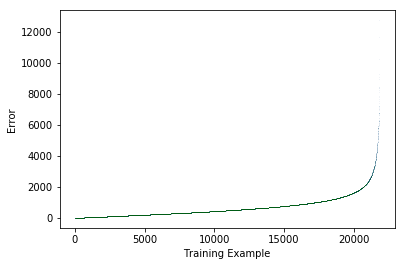

In [8]:
plt.scatter(cnn_error_x, cnn_error_val,  color='blue', s=0.0001)
plt.scatter(hog_error_x, hog_error_val,  color='green', s=0.0001)
plt.xlabel('Training Example')
plt.ylabel('Error')